# Chapter 9: Unsupervised Learning Techniques

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

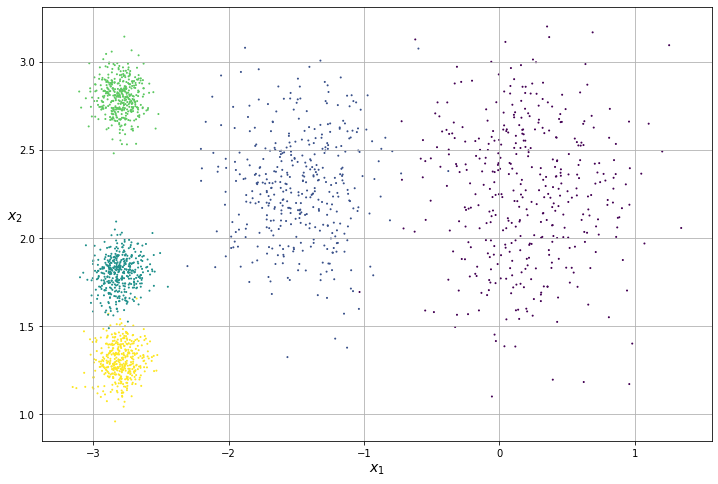

In [44]:
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.grid()


## KMeans

In [11]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [12]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

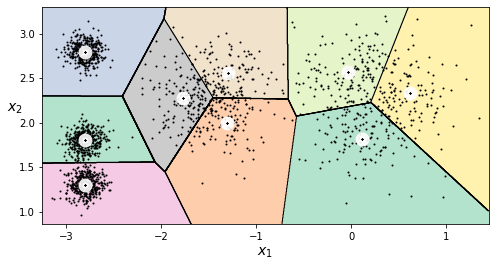

In [34]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()


In [16]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.62337889822365

In [17]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [40]:
from sklearn.metrics import silhouette_score

silhueta = []
inercia = []
kk = []
for k in range(2,10):
    kk.append(k)
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    silhueta.append(silhouette_score(X,kmeans.labels_))
    inercia.append(kmeans.inertia_)
    


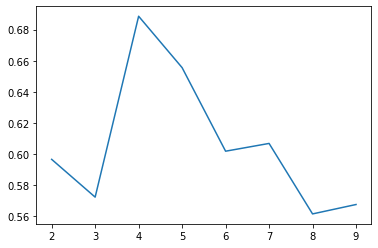

In [41]:
plt.plot(kk,silhueta)

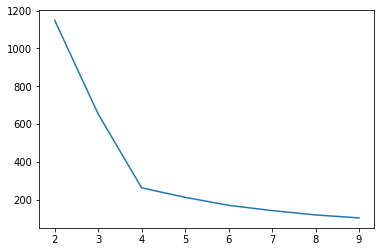

In [42]:
plt.plot(kk,inercia)

## DBScan

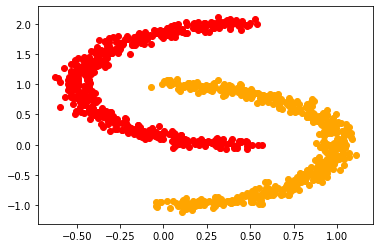

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000,noise=0.05)
dbscan = DBSCAN(eps=0.1,min_samples=5)
y_pred = dbscan.fit_predict(X)

x1=X[y_pred==1]
x0=X[y_pred==0]

plt.scatter(x1[:,1],x1[:,0],color='red')

plt.scatter(x0[:,1],x0[:,0],color='orange')

# KNN Predict

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 1, 0, 1])

In [66]:
knn.predict_proba(X_new)

array([[0.86, 0.14],
       [0.  , 1.  ],
       [0.78, 0.22],
       [0.  , 1.  ]])

# Exercices

### How would you define clustering? Can you name a few clustering algorithms?

I would define as the process of discovering groups (or clusters) without labaeled data. Some algorithms are: DBSCan (density based) and KMeans (Distance based)

Algorithms: KMeans, DBSCAN, GMMs, ...

### What are some of the main applications of clustering algorithms?

Fraud Detection, Customer Segmentation, Social Networks Analysis, data analysis/visualization, dimensionality reduction ...

### Describe 2 techniques to select the right number of clusters when using K-Means?

The silouhette density score (maximum score)

The elbow rule (choose the number of clusters that is in the elbow of the plot).

### What is label propagation? Why would you implement it? and How?

Label propagation is when we have few labeled data and a lot of unlabeled instances and we want to propagate the labels from the annotated samples to the unlabeled ones.

To do this first we train an algorithm to do unsupervised clustering and then predict the labels into the ones that correspond to the same clusters of the annotated instances.

### Can you name two clustering algorithms that can scale to large datasets? and two that look for regions of high density?

DBSCAN (if $\epsilon$ is small enough), and KMeans. DBSCAN and MeanShift for high density.

### Can you think of a use case when active learning would be useful? How would you implement it?

It would be useful when we're having a small labeled dataset and a lot of unlabeled instances.

First we train the algorithm of the available labeled instances. Then we predict on the unlabeled instances and give the annotator the instances that the algorithm isn't sure about. We loop until the increase in performance in not noticeable anymore (called uncertainty sampling).

### What is the difference between Anomaly Detection & Novelty Detection?

Anomaly Detection: Detecting instances that don't belong to the same data distribution of the training data.

Novelty Detection: Detecting instances that look extreme but belong to the same distribution of the training data.

### What is a Gaussian Mixture? What Tasks can you use it for?

Gaussian Mixture is a probabilistic model that describe the probability that an instance belongs to one of the distributions. It is used to uncover clusters in unlabeled data assuming that all of the clusters correspond to gaussian distributions.

### Can you find two techniques to find the right number of clusters when using a Gaussian mixture model?

Plotting the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC) as a function of the number of clusters then chose the number that minimizes either.